# Analyzing FBM
> Inspecting the SPIVAE trained on FBM.

In this notebook,
we aim at visualizing what the trained SPIVAE learned.
We look into the output, the latent neurons, and the loss distribution of the model.

In [ ]:
#|hide
from SPIVAE.imports import *

# Load model

We load the model to characterize from its checkpoint saved after [training](training_fbm.html).

In [ ]:
DEVICE='cpu'
E=144
model_name = 'fbm' + f'_E{E}'
c_point, model = load_checkpoint("./models/"+model_name,device=DEVICE)

Loading checkpoint: ./models/fbm_E144.tar
on device: cpu


We can check the parameters of the data and the model.

In [ ]:
ds_args, model_args = c_point['ds_args'],c_point['model_args']
print(ds_args, model_args)

{'path': '../../data/raw/', 'model': 'fbm', 'N': 476, 'T': 400, 'D': array([1.00000000e-05, 2.15443469e-05, 4.64158883e-05, 1.00000000e-04,
       2.15443469e-04, 4.64158883e-04, 1.00000000e-03, 2.15443469e-03,
       4.64158883e-03, 1.00000000e-02]), 'alpha': array([0.2 , 0.28, 0.36, 0.44, 0.52, 0.6 , 0.68, 0.76, 0.84, 0.92, 1.  ,
       1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ]), 'seed': 0, 'valid_pct': 0.2, 'bs': 256, 'N_save': 6000, 'T_save': 400} {'o_dim': 399, 'nc_in': 1, 'nc_out': 6, 'nf': [16, 16, 16, 16], 'avg_size': 16, 'encoder': [200, 100], 'z_dim': 6, 'decoder': [100, 200], 'beta': 0.004, 'in_channels': 1, 'res_channels': 16, 'skip_channels': 16, 'c_channels': 6, 'g_channels': 0, 'res_kernel_size': 3, 'layer_size': 4, 'stack_size': 1, 'out_distribution': 'Normal', 'num_mixtures': 1, 'use_pad': False, 'model_name': 'SPIVAE'}


We generate the test set as explained in the [data docs](../source/data.html#fractional-brownian-motion). You can skip this step if you already generated a test set using the data generation notebook but take care of the path.

In [ ]:
Ds = np.geomspace(1e-6,1e-1,61)[6:-6]
alphas = np.linspace(0.04,1.96,49)
n_alphas, n_Ds = len(alphas), len(Ds)
ds_args = dict(path="../../data/test/", model='fbm', # 'sbm'
               N=int(100_000/n_alphas/n_Ds), T=400,
               D=Ds, alpha=alphas,
               N_save=1_000, T_save=400,
               seed=0, valid_pct=.8, bs=2**8,)

In [ ]:
dataset = AD.create_dataset(T=ds_args["T"], N_models=ds_args["N"],
                            exponents=ds_args["alpha"],
                            dimension=1, models=[2],  # fbm
                            t_save=ds_args["T_save"], N_save=ds_args["N_save"],
                            save_trajectories=True, path="../../data/test/")

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

We load the dataset. At this point, we can load any subset of the whole test set by updating the `ds_args` dict.

In [ ]:
dls = load_data(ds_args).to(DEVICE)
dls[0].drop_last, dls[1].drop_last, dls[1].bs, dls.device

(True, False, 256, 'cpu')

We can see the mean loss on a batch.

In [ ]:
print('RF:', model.receptive_field, 'bs:', dls.bs)
x,y=b = dls.one_batch(); t = model(x)
loss_fn = Loss(model.receptive_field, model.c_channels, 
                    beta=model_args['beta'], reduction='mean')
l = loss_fn(t,y).item(); 
print('Current mean loss on a batch: ',l)

RF: 32 bs: 256
Current mean loss on a batch:  -2.3761658668518066


In [ ]:
learn = Learner(dls, model, loss_func=loss_fn, opt_func=Adam,)
if torch.cuda.is_available() and DEVICE=='cuda': learn.model.cuda()

# Get predictions

We now get the predictions for the test set and take the labels indices to keep track of them during the analysis.

In [ ]:
ds_in,preds,ds_targs = learn.get_preds(with_input=True,) # predicts in validation dataset

alphas_items = learn.dls.valid.items[:,0]
Ds_items     = learn.dls.valid.items[:,1]
ds_in_labels = learn.dls.valid.items[:,:2] 
u_a=np.unique(alphas_items,)
u_D=np.unique(Ds_items,)

alphas_idx = [np.flatnonzero(alphas_items==a) for a in u_a]
Ds_idx     = [np.flatnonzero(Ds_items==D)     for D in u_D]

intersect_idx = np.array([[reduce(partial(np.intersect1d,assume_unique=True),
                                  (alphas_idx[i],Ds_idx[j]))
                           for j,D in enumerate(u_D)] for i,a in enumerate(u_a)], dtype=object)

alphas_idx_flat = [item for sublist in alphas_idx for item in sublist]
Ds_idx_flat     = [item for sublist in Ds_idx     for item in sublist]

pred, mu, logvar, c = preds

print(ds_in.shape, learn.dls.valid.items.shape)
print(L(map(len, alphas_idx)), len(alphas_idx_flat), L(map(len, Ds_idx)), len(Ds_idx_flat))

In [ ]:
p_mix, mu_out, log_std_out =  map(np.array,map(torch.squeeze,pred.chunk(3,dim=1)))
std_out = np.exp(log_std_out)

# Check output mean and variance

As a fast check of the model, we can see if the output mean and variance are correct.

We can compare with the same graphics made for the input at the [data notebook](../source/data.html#fbm).
In the next plot, the mean is around zero, without significant deviations.

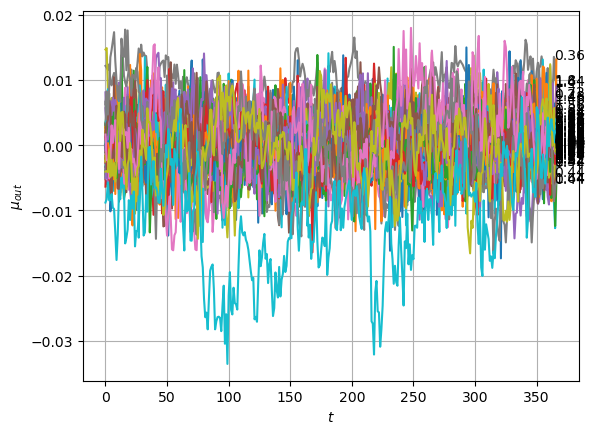

In [ ]:
plot_xf_D(mu_out, lambda x: x.mean(0),ds_args, intersect_idx,
          x_label=r'$t$', y_label=r'$\mu_{out}$', f_a=f_a_text,
          each_D=False, each_g=False, show_legend=False,)

We observe $D$ is the expected for $\alpha\sim 1$ while the rest are a bit lower.
This is a small effect of the loss distribution, as we explain further [below](#loss-distribution).

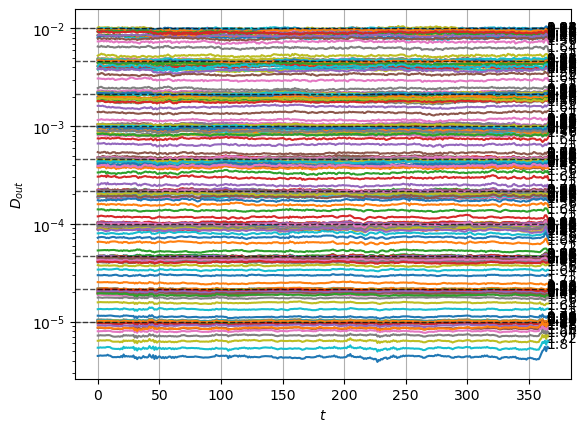

In [ ]:
# D_out from std_out
plot_xf_D(std_out, lambda x: sig2D(x.mean(0)),ds_args, intersect_idx,
          f_a=f_a_text,
          f_D=lambda D: plt.axhline(D, c='k', lw=1, ls='--', alpha=0.7),
          each_D=False,each_g=False, x_label=r'$t$', y_label=r'$D_{out}$',
          y_scale='log', show_legend=False,
         )

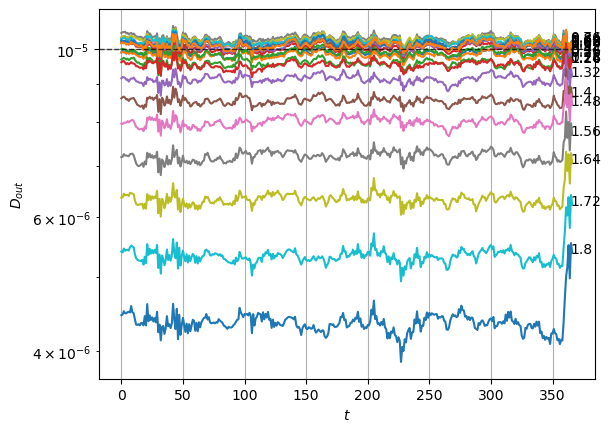

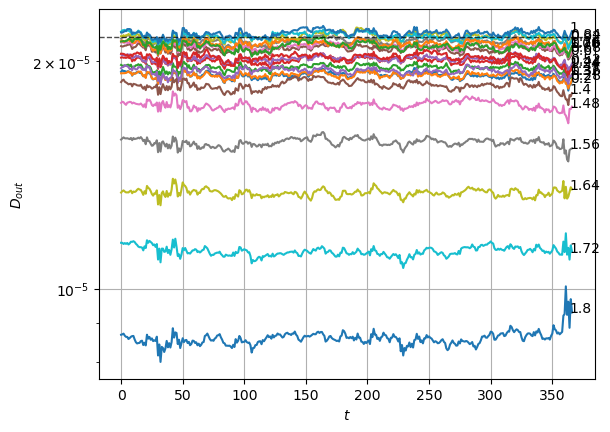

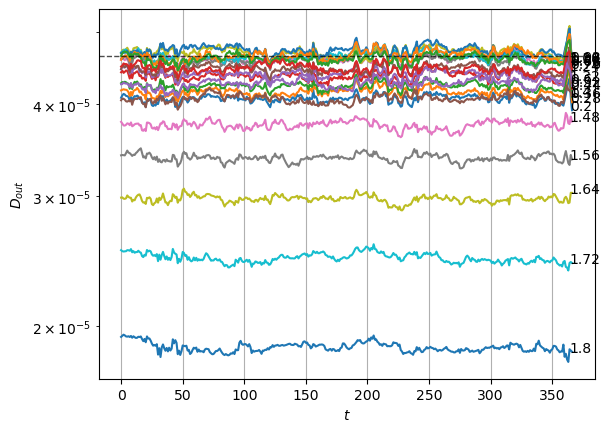

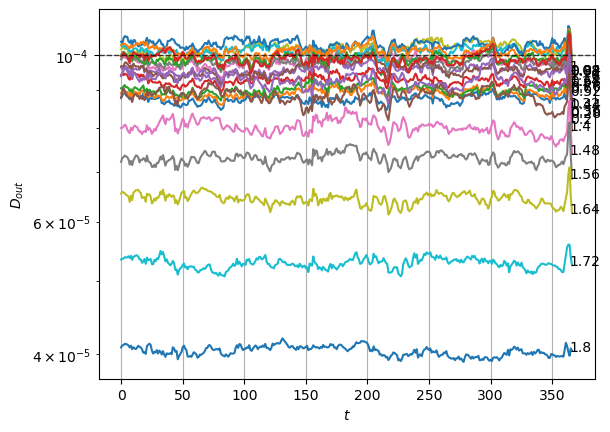

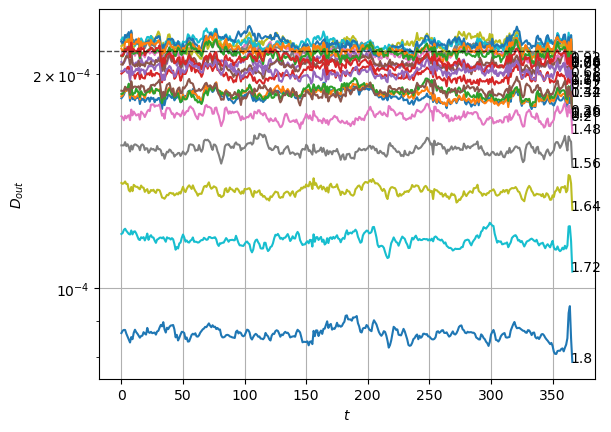

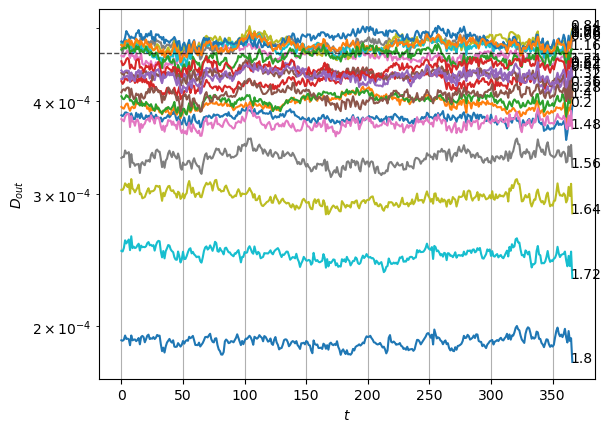

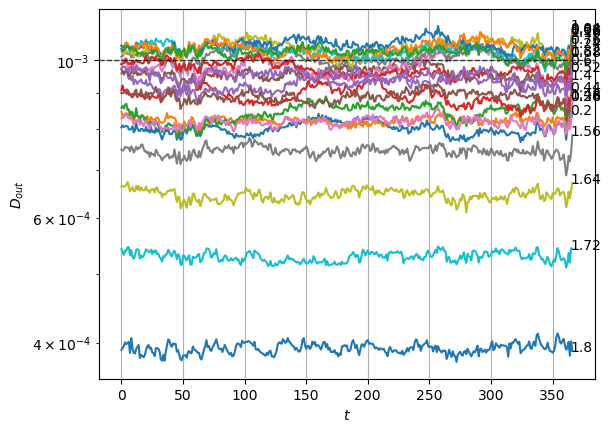

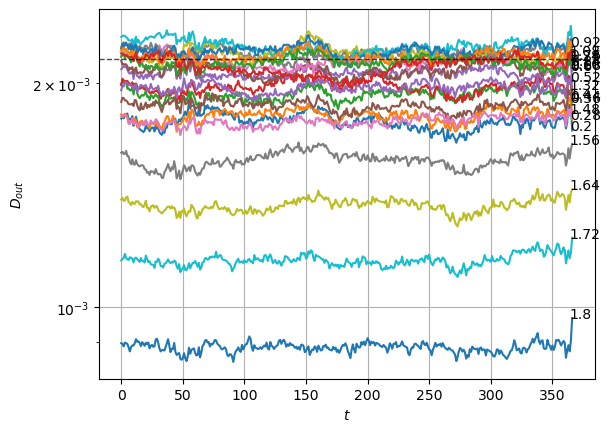

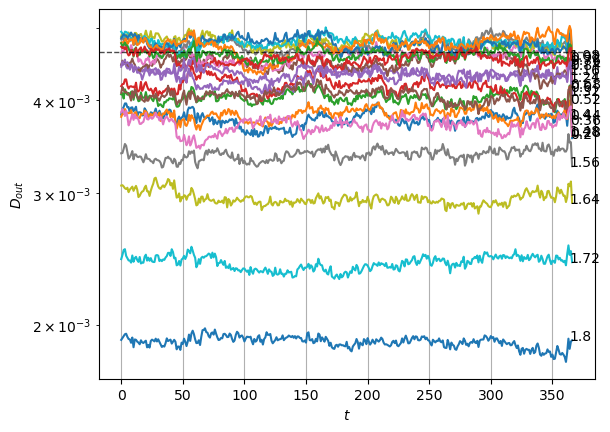

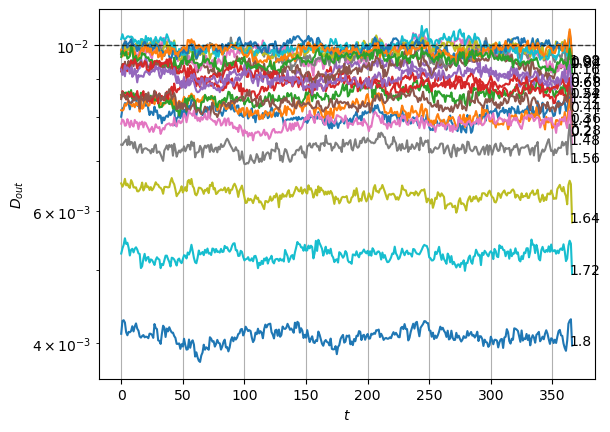

In [ ]:
#|hide
# her each D in a separated subplot
# D_out from std_out
plot_xf_D(std_out, lambda x: sig2D(x.mean(0)),ds_args, intersect_idx,
          f_a=f_a_text,
          f_D=lambda D: plt.axhline(D, c='k', lw=1, ls='--', alpha=0.7),
          each_D=True,each_g=False, x_label=r'$t$', y_label=r'$D_{out}$',
          y_scale='log', show_legend=False,
         )

As the mean and variance are what we expect, we proceed with the interpretation of the latent neurons.

# Interpret latent neurons

As we explain in the [model notebook](../source/models.html), the architecture we trained is designed to have an interpretable bottleneck, i.e., a few neurons that should encode relevant features of the input dataset to have a good generation.

In the model, the latent neurons $\mathbf{z}$ have a Gaussian distribution $\mathcal{N}(\mu=0,\sigma^2=1)$ to create a continuous latent space.
Meaningful latent neurons have a mean $\mu$ related to some feature of the data and a small variance $\sigma^2$.
On the contrary, the noised neurons show a close to zero mean and near unit variance, as enforced by the divergence term during training.

## Latent neuron activations distribution

The following plots show the distribution of the mean and variance activations.
Two neurons have a spread mean and very small variances,
while the rest of neurons' activations lie around zero mean and unit variance.
Colors indicate each latent neuron index.

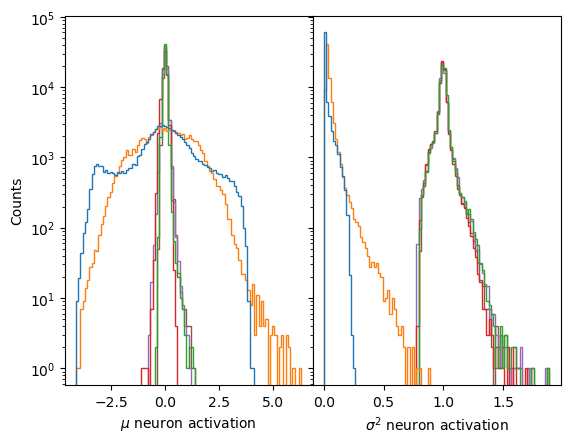

In [ ]:
fig, axs = plt.subplots(1,2,sharey=True,gridspec_kw=dict(wspace=0));
axs[0].hist(mu.T, 100, histtype='step', log=True);
axs[0].set_xlabel(r'$\mu$ neuron activation');
axs[0].set_ylabel('Counts');
axs[1].hist(np.exp(logvar).T, 100, histtype='step', log=True);
axs[1].set_xlabel(r'$\sigma^2$ neuron activation');

We can also detect which neurons are being informative with simple metrics. For instance, the authors of [Lu et al. Phys. Rev. X **10**, 031056](https://doi.org/10.1103/PhysRevX.10.031056) make use of two quantities to distinguish such neurons, the variance of the mean, and the mean of the variance (we use here the logarithm for visual convenience).

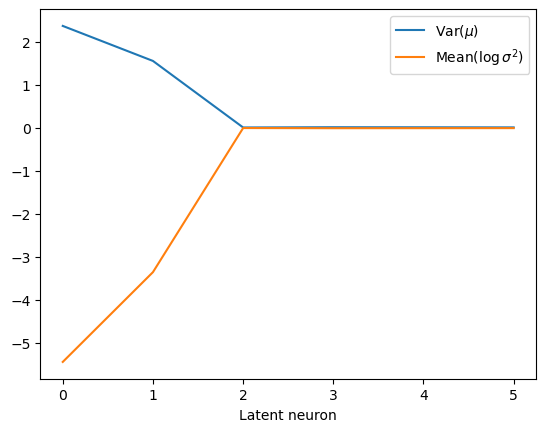

In [ ]:
plt.plot(mu.var(0), label=r'Var($\mu$)');
plt.plot(logvar.mean(0), label=r'Mean($\log\sigma^2$)');
plt.xlabel('Latent neuron index'); plt.legend();

## $\mu$ relation with $\alpha$ and $D$

To interpret these neurons, we look at their relation with the physical parameters we expect in this dataset, the anomalous exponent $\alpha$ and the generalized diffusion coefficient $D$.

One of the two _surviving_ neurons is directly related to $\alpha$ while the other follows a uniform spread except for big $\alpha$. The uninformative neurons remain at zero mean.

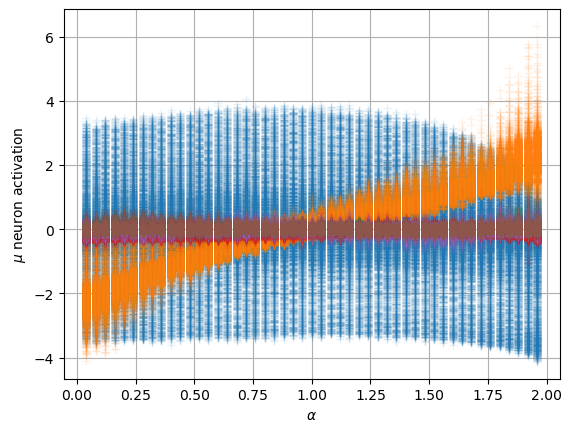

In [ ]:
plt.plot(alphas_items, mu,'+', alpha=0.1);
plt.xlabel(r'$\alpha$'); plt.ylabel(r'$\mu$ neuron activation');
plt.grid();

For the diffusion coefficient, we have a similar scenario.
One neuron shows a strong relationship with $D$,
while the neuron, that had a direct relation with $\alpha$,
also shows a relation with small and big $D$.


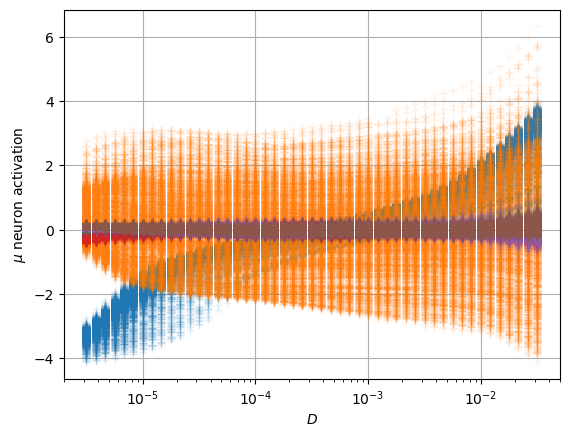

In [ ]:
plt.plot(Ds_items, mu,'+', alpha=0.1);
plt.xlabel(r'$D$'); plt.ylabel(r'$\mu$ neuron activation');
plt.xscale('log'); plt.grid(); 

To properly observe the relation of the latent neurons with the parameters,
we show the distribution of the surviving neurons' activations relative to the parameters.
This constitutes an example of the Fig. 2 in [our paper](https://doi.org/10.48550/arXiv.2307.11608).

In [ ]:
cmap_latent = 'Blues'

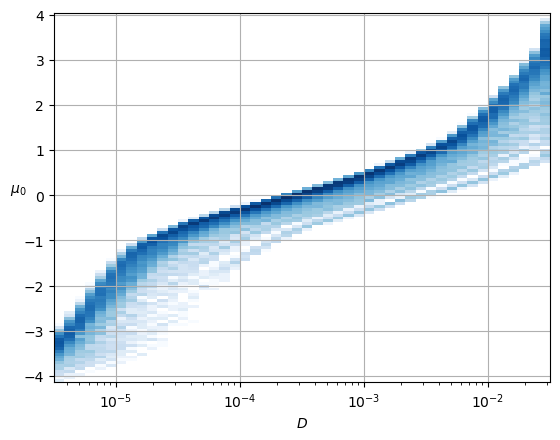

In [ ]:
mu_idx = 0
plt.hist2d(Ds_items, mu[:,mu_idx].numpy(),
           bins=(u_D,125), cmin=2, cmap=cmap_latent,
           norm = matplotlib.colors.LogNorm());
plt.xscale('log'); plt.grid();
plt.xlabel(r'$D$'); plt.ylabel(r'$\mu_' f'{mu_idx}' '$', rotation=0);

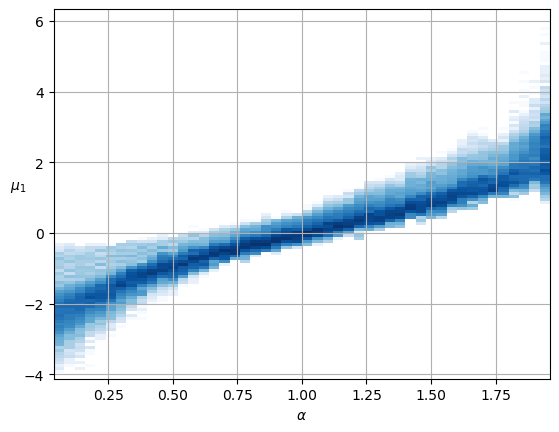

In [ ]:
mu_idx = 1
plt.hist2d(alphas_items, mu[:,mu_idx].numpy(),
           bins=(u_a,125), cmin=2, cmap=cmap_latent,
           norm = matplotlib.colors.LogNorm());
plt.xlabel(r'$\alpha$'); plt.ylabel(r'$\mu_' f'{mu_idx}' '$', rotation=0); plt.grid();

The _surviving_ neurons respectively exhibit an almost linear relationship with the parameters $D$ and $\alpha$ in the training range.

The primary reason for the broadening of the distributions above is attributed to the combined representation of the parameters in the latent neurons.

To discern how combined this representation is, the next figure shows $\mu_i$ with respect to both parameters at the same time.

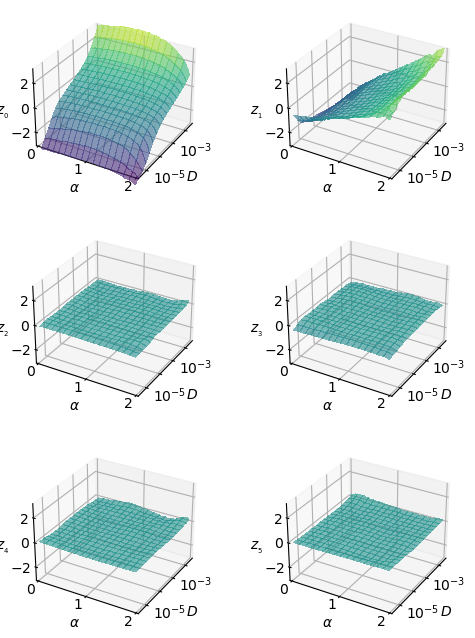

In [ ]:
fig, axs = plt.subplots(3,2, subplot_kw={'projection':'3d'},figsize=(6,8))
for mu_idx in range(mu.shape[-1]):
    Z = np.empty((len(u_a), len(u_D)))
    for j,D in enumerate(u_D):
        for i,a in enumerate(u_a):
            Z[i,j] = mu[intersect_idx[i,j],mu_idx].mean()
    Z = Z.T
    
    ax = axs.flat[mu_idx]
    X = u_a; Y = np.log10(u_D)
    X, Y = np.meshgrid(X, Y)
    cmap_latent_3d = matplotlib.cm.viridis
    norm_3d = matplotlib.colors.Normalize(vmin=-4,vmax=4)
    surf = ax.plot_surface(X, Y, Z, cmap=cmap_latent_3d,norm=norm_3d, alpha=0.6,
                           rstride=3, cstride=3,
                           linewidth=0, antialiased=False,)
    ax.xaxis.set_rotate_label(False)  # disable automatic rotation
    ax.set_xlabel(r'$\alpha$', labelpad=-8,rotation=0,ha='right',va='center');
    ax.set_xticks([0,1,2],[0,1,2],ha='right',va='center', )#rotation_mode='anchor')
    ax.set_xlim([0,2]);ax.set_ylim(np.log10([3.16e-6,3.163e-2]));
    ax.yaxis.set_rotate_label(False)  # disable automatic rotation
    ax.set_ylabel(r'$D$', labelpad=-4,rotation=0,ha='left',va='bottom');
    ax.set_yticks([-5,-4,-3,-2],[r'$10^{-5}$','',r'$10^{-3}$',''],ha='left',va='center');
    ax.tick_params(pad=-6)
    ax.yaxis.set_tick_params(pad=-4)
    ax.xaxis.set_tick_params(pad=-4)
    ax.zaxis.set_tick_params(pad=-6)
    ax.zaxis.set_rotate_label(False)  # disable automatic rotation
    ax.set_zlabel(r'$z_{_' f'{mu_idx}' r'}$',rotation=0,labelpad=-8, va='center', ha='right')
    ax.set_zlim(-3,3);
    ax.set_zticks([-2,0,2],[r'$-2$',r'$0$',r'$2$'], ha='right', va='center')
    ax.set_box_aspect(None, zoom=1)
    ax.zaxis._axinfo['juggled'] = (1,2,0)
    ax.tick_params(axis='x', which='major', direction='in')
    ax.tick_params(axis='y', which='major', direction='in')
    ax.tick_params(axis='z', which='major', direction='in')

In the following [generation tutorial](./generation_fbm.html), we will observe how selecting values from the latent neurons, we can generate trajectories that exhibit these relationships with $\alpha$ and $D$. 

# Loss distribution

The loss distribution illustrates how the model performs for different inputs. 
As explained in the Appendix of [our paper](https://doi.org/10.48550/arXiv.2307.11608), the loss distribution is directly related with the dataset parameters.
In particular, it has a strong relationship with the diffusion coefficient, as it is related to the scale of the displacements.

In [ ]:
loss_fn_unreduced = Loss(learn.model.receptive_field, learn.model.c_channels>0, beta=model_args['beta'], reduction='none')
losses = []
with torch.no_grad():
    learn.dls[1].drop_last=False
    for b in tqdm(learn.dls[1]):
        x,y=b;  t = model(x)
        losses.append(loss_fn_unreduced(t,y))

print(len(losses), len(losses[0]), losses[0][0].shape)
loss_nll = np.vstack([a[0].squeeze().cpu().numpy() for a in losses])
print(loss_nll.shape)
loss_nll_mean_aD_val = np.array([[loss_nll[intersect_idx[i,j]].mean()  for j,D in enumerate(ds_args["D"])]for i,a in enumerate(ds_args["alpha"])])

  0%|          | 0/308 [00:00<?, ?it/s]

308 3 torch.Size([256, 367, 1])
(78752, 367)


The following plot shows the mean reconstruction loss per $\alpha$ and $D$.

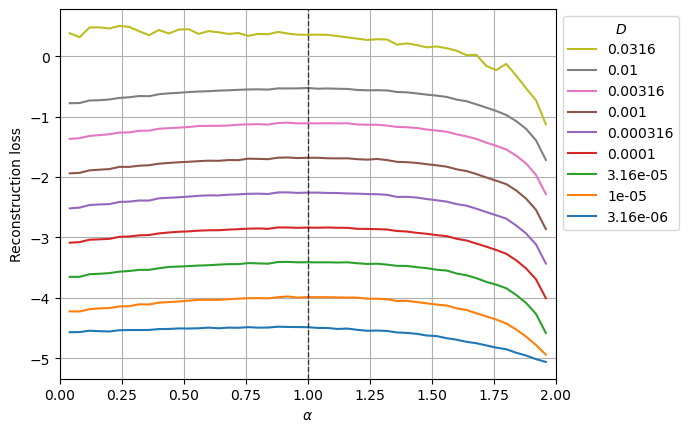

In [ ]:
D_idx = range(0,49,6)
for j,D in zip(D_idx,ds_args["D"][D_idx]):
    plt.plot(u_a, loss_nll_mean_aD_val[:,j],label=f'{D:.3g}');
plt.xlabel(r'$\alpha$'); plt.ylabel('Reconstruction loss'); plt.grid();
plt.xlim(0,2)
plt.axvline(1, lw=1, ls='--', c='k', alpha=0.7);
h,l = plt.gca().get_legend_handles_labels()
plt.legend(h[::-1],l[::-1],title=r'$D$',bbox_to_anchor=(1,1),);

The loss is lower for smaller $D$ and almost constant for $\alpha$ having the maximum at $\alpha=1$ (Brownian motion) and a bit lower on the extreme cases of $\alpha$ approaching zero and two (Directed motion).

The curves corresponding to values of $D$ outside the training range smooth this behavior.